1. Data Exploration:
a. Load the credit risk dataset using Python libraries like pandas and explore its structure. Describe 
the features, target variable, and data distribution.
b. Discuss the importance of credit risk assessment in the financial industry.


In [1]:
#import base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('credit_risk_dataset.csv')

data.head()


,person_age,person_income,loan_amnt,loan_status,cb_person_default_on_file
0,22,59000,35000,1,Y
1,21,9600,1000,0,N
2,25,9600,5500,1,N
3,23,65500,35000,1,N
4,24,54400,35000,1,Y


In [3]:
data.isna().sum()

person_age                   0
person_income                0
loan_amnt                    0
loan_status                  0
cb_person_default_on_file    0
dtype: int64

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

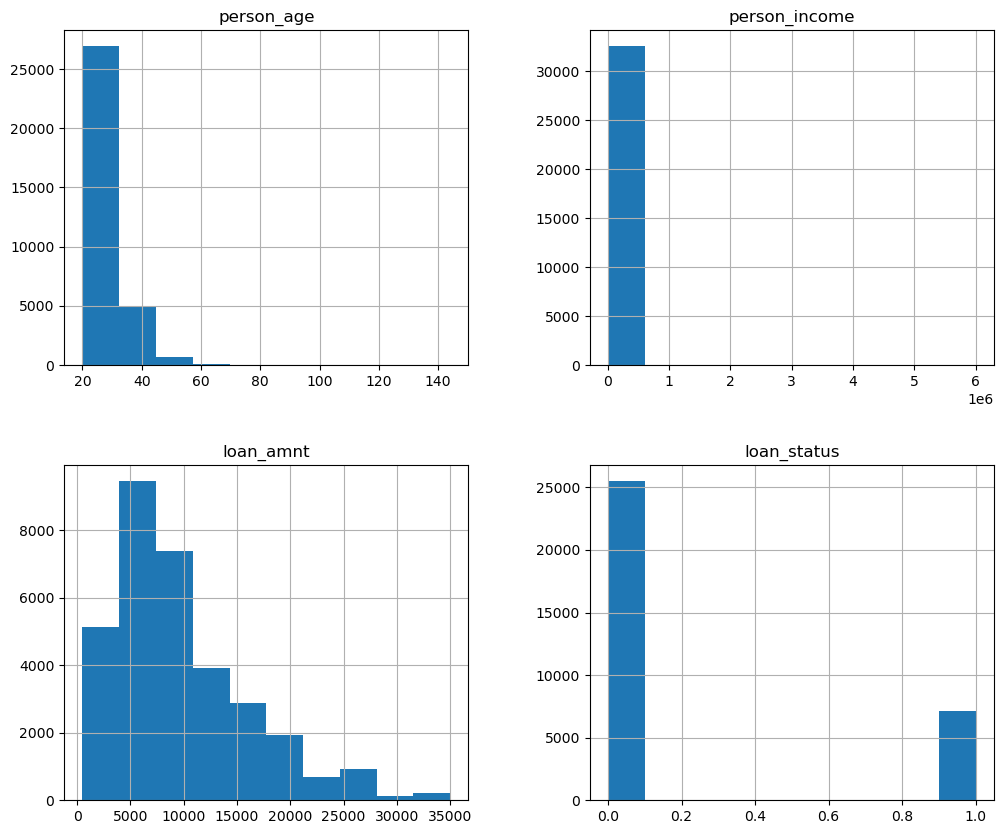

In [4]:
data.hist(figsize=(12,10))


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['cb_person_default_on_file']=le.fit_transform(data['cb_person_default_on_file'])
data.head()

,person_age,person_income,loan_amnt,loan_status,cb_person_default_on_file
0,22,59000,35000,1,1
1,21,9600,1000,0,0
2,25,9600,5500,1,0
3,23,65500,35000,1,0
4,24,54400,35000,1,1


2. Classification with Linear SVM:
a. Implement a linear SVM classifier using Python libraries like scikit-learn to predict credit risk 
based on applicant information.
b. Split the dataset into training and testing sets, and train the linear SVM model.
c. Evaluate the linear SVM model's performance using metrics such as accuracy, precision, recall, 
and F1-score.


In [6]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

X shape:	 (32581, 4)

Y shape:	 (32581, 1)
****************Training Data Shape********************

Training data-X- Shape:	 (29322, 4)

Training data-y- Shape:	 (29322, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (3259, 4)

Testing data(y-Outcome) Shape:	 (3259, 1)


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score


support_reg=SVR(kernel='linear')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


C:\ProgramData\anaconda3-1\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
